# France

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator) #gia ta ticks
import numpy as np
import seaborn as sns
# Use white grid plot background from seaborn
#sns.set(font_scale=1.5, style="whitegrid")
#sns.set_style('darkgrid')
#sns.set_context("poster")
from scipy.optimize import curve_fit
from lmfit import Model
import scipy.optimize as scopt

#years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()       #every day
#yearsFmt = mdates.DateFormatter('%Y')

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from datetime import datetime


df = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-12-10.csv')#,index_col='dateRep',parse_dates=True)
#df.describe()
df.head()
#df.columns


C:\Users\pol\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  12/10/2020   10     12  2020    202      16             Afghanistan    AF   
1   12/9/2020    9     12  2020    135      13             Afghanistan    AF   
2   12/8/2020    8     12  2020    200       6             Afghanistan    AF   
3   12/7/2020    7     12  2020    210      26             Afghanistan    AF   
4   12/6/2020    6     12  2020    234      10             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           6.968658           
1                                           6.963401           
2                                           7.094835           
3                                           7.215755           
4                                           7.326160

In [2]:
FRA=df.loc[df['countriesAndTerritories'] == 'France'] #country selection

In [3]:
FRA

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
20088  12/10/2020   10     12  2020  14595     296                  France   
20089   12/9/2020    9     12  2020  13713     831                  France   
20090   12/8/2020    8     12  2020   3411     366                  France   
20091   12/7/2020    7     12  2020  11022     174                  France   
20092   12/6/2020    6     12  2020  12923     214                  France   
...           ...  ...    ...   ...    ...     ...                     ...   
20429    1/4/2020    4      1  2020      0       0                  France   
20430    1/3/2020    3      1  2020      0       0                  France   
20431    1/2/2020    2      1  2020      0       0                  France   
20432    1/1/2020    1      1  2020      0       0                  France   
20433  12/31/2019   31     12  2019      0       0                  France   

      geoId countryterritoryCode  popData2019 continentExp  \
20088    FR                  FRA   67012883.0       Europe   
20089    FR                  FRA   67012883.0       Europe   
20090    FR                  FRA   67012883.0       Europe   
20091    FR                  FRA   67012883.0       Europe   
20092    FR                  FRA   67012883.0       Europe   
...     ...                  ...          ...          ...   
20429    FR                  FRA   67012883.0       Europe   
20430    FR                  FRA   67012883.0       Europe   
20431    FR                  FRA   67012883.0       Europe   
20432    FR                  FRA   67012883.0       Europe   
20433    FR                  FRA   67012883.0       Europe   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
20088                                         229.984136           
20089                                         232.501562           
20090                                         225.699885           
20091                                         227.253318           
20092                                         230.439272           
...                                                  ...           
20429                                                NaN           
20430                                                NaN           
20431                                                NaN           
20432                                                NaN           
20433                                                NaN           

[346 rows x 12 columns]

In [4]:
4/67012883

5.969001512738976e-08

In [5]:
FRA.head() #decide which columns to select 

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
20088  12/10/2020   10     12  2020  14595     296                  France   
20089   12/9/2020    9     12  2020  13713     831                  France   
20090   12/8/2020    8     12  2020   3411     366                  France   
20091   12/7/2020    7     12  2020  11022     174                  France   
20092   12/6/2020    6     12  2020  12923     214                  France   

      geoId countryterritoryCode  popData2019 continentExp  \
20088    FR                  FRA   67012883.0       Europe   
20089    FR                  FRA   67012883.0       Europe   
20090    FR                  FRA   67012883.0       Europe   
20091    FR                  FRA   67012883.0       Europe   
20092    FR                  FRA   67012883.0       Europe   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
20088                                         229.984136           
20089                                         232.501562           
20090                                         225.699885           
20091                                         227.253318           
20092                                         230.439272

In [6]:
population=df['popData2019'][20088]
print(population)

67012883.0


In [7]:
FRA=FRA[['dateRep','cases']] #select columns

In [8]:
FRA = FRA.rename(index = lambda x: x - 20087).sort_index(axis=0 ,ascending=False) #concise indexing

In [9]:
FRA= FRA.rename({'dateRep': 'Date'}, axis=1)  # change the name of the column of dates

In [10]:
FRA.index=range(346) #reverse the numbering of indexes beginning from last day of 2019

In [11]:
FRA['Date'] = pd.to_datetime(FRA['Date'],format="%m/%d/%Y")

In [12]:
FRA.head(60)

Date  cases
0  2019-12-31      0
1  2020-01-01      0
2  2020-01-02      0
3  2020-01-03      0
4  2020-01-04      0
5  2020-01-05      0
6  2020-01-06      0
7  2020-01-07      0
8  2020-01-08      0
9  2020-01-09      0
10 2020-01-10      0
11 2020-01-11      0
12 2020-01-12      0
13 2020-01-13      0
14 2020-01-14      0
15 2020-01-15      0
16 2020-01-16      0
17 2020-01-17      0
18 2020-01-18      0
19 2020-01-19      0
20 2020-01-20      0
21 2020-01-21      0
22 2020-01-22      0
23 2020-01-23      0
24 2020-01-24      0
25 2020-01-25      3
26 2020-01-26      0
27 2020-01-27      0
28 2020-01-28      0
29 2020-01-29      1
30 2020-01-30      1
31 2020-01-31      1
32 2020-02-01      0
33 2020-02-02      0
34 2020-02-03      0
35 2020-02-04      0
36 2020-02-05      0
37 2020-02-06      0
38 2020-02-07      0
39 2020-02-08      5
40 2020-02-09      0
41 2020-02-10      0
42 2020-02-11      0
43 2020-02-12      0
44 2020-02-13      0
45 2020-02-14      0
46 2020-02-15      0
47 2020-02-16      0
48 2020-02-17      1
49 2020-02-18      0
50 2020-02-19      0
51 2020-02-20      0
52 2020-02-21      0
53 2020-02-22      0
54 2020-02-23      0
55 2020-02-24      0
56 2020-02-25      0
57 2020-02-26      2
58 2020-02-27      3
59 2020-02-28     21

In [13]:
#create a distinct column of cumulative cases begining from reported case number 1
FRA['cumulative_cases']=FRA['cases']
for i in range(1,346):
    FRA.loc[i, 'cumulative_cases'] = FRA.loc[i, 'cases'] + FRA.loc[i-1, 'cumulative_cases'] #create df column of cumulative cases


In [14]:
# convert the Date column to a datetime type
FRA.Date = pd.to_datetime(FRA.Date)

# set the column of Date as the index
FRA.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

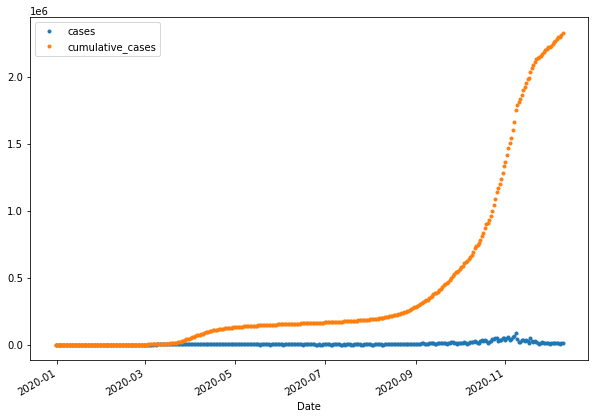

In [15]:
FRA.plot(style='o',markersize=3,figsize=(10,7),x_compat=True)

In [16]:
FRA.tail(60)

cases  cumulative_cases
Date                               
2020-10-12  16101            734974
2020-10-13   8505            743479
2020-10-14  12993            756472
2020-10-15  22591            779063
2020-10-16  30621            809684
2020-10-17  25086            834770
2020-10-18  32427            867197
2020-10-19  29837            897034
2020-10-20  13243            910277
2020-10-21  20468            930745
2020-10-22  26676            957421
2020-10-23  41622            999043
2020-10-24  42032           1041075
2020-10-25  45422           1086497
2020-10-26  52010           1138507
2020-10-27  26771           1165278
2020-10-28  33417           1198695
2020-10-29  36437           1235132
2020-10-30  47637           1282769
2020-10-31  49215           1331984
2020-11-01  32641           1364625
2020-11-02  49290           1413915
2020-11-03  52518           1466433
2020-11-04  36330           1502763
2020-11-05  40558           1543321
2020-11-06  58046           1601367
2020-11-07  60486           1661853
2020-11-08  86852           1748705
2020-11-09  38619           1787324
2020-11-10  20155           1807479
2020-11-11  22180           1829659
2020-11-12  35879           1865538
2020-11-13  33172           1898710
2020-11-14  23794           1922504
2020-11-15  32095           1954599
2020-11-16  27228           1981827
2020-11-17   9406           1991233
2020-11-18  45522           2036755
2020-11-19  28383           2065138
2020-11-20  21150           2086288
2020-11-21  22882           2109170
2020-11-22  17881           2127051
2020-11-23  13157           2140208
2020-11-24   4452           2144660
2020-11-25   9155           2153815
2020-11-26  16282           2170097
2020-11-27  13563           2183660
2020-11-28  12539           2196199
2020-11-29  12500           2208699
2020-11-30   9784           2218483
2020-12-01   4005           2222488
2020-12-02   8083           2230571
2020-12-03  14064           2244635
2020-12-04  12696           2257331
2020-12-05  11221           2268552
2020-12-06  12923           2281475
2020-12-07  11022           2292497
2020-12-08   3411           2295908
2020-12-09  13713           2309621
2020-12-10  14595           2324216

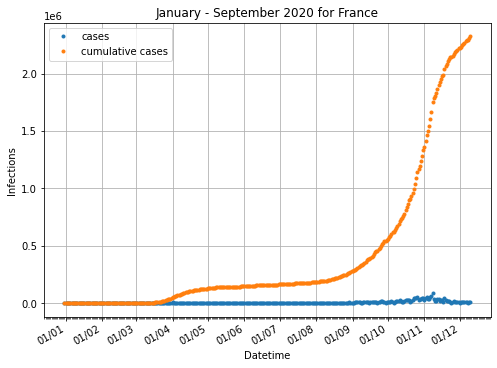

In [17]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(8,6))

# Add x-axis and y-axis
ax.plot(FRA['cases'],'o',FRA['cumulative_cases'],'o',markersize=3) 



# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="Infections",
       title="January - December 2020 for France")


# Define the date format
date_form = DateFormatter("%d/%m")#/%Y")
ax.xaxis.set_major_formatter(date_form)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

# format the ticks
ax.xaxis.set_major_locator(months)

ax.xaxis.set_minor_locator(days)
#ax.set_xticklabels(labels, rotation=45)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
ax.legend(['cases','cumulative cases'])

ax.grid(True)
plt.show()

# Define Function and start lmfit

In [19]:
def fkin1(t1,b1,c1):

    TotalInfected1=1/(1+c1*t1**(b1))
    return TotalInfected1


def fkin2(t2, a2, c2, h2):
   
    f=((a2*t2)**(1-h2))/(h2-1)
        
    TotalInfected2=1/(1+c2*np.exp(f))
    return TotalInfected2    

def fkin3(t3,b3,c3):

    TotalInfected3=1/(1+c3*t3**(b3))
    return TotalInfected3


def fkin4(t4, a4, c4, h4):
   
    f=((a4*t4)**(1-h4))/(h4-1)
        
    TotalInfected4=1/(1+c4*np.exp(f))
    return TotalInfected4  

In [20]:
fkmod1= Model(fkin1)
print(fkmod1.param_names)

fkmod2 = Model(fkin2)
print(fkmod2.param_names)

fkmod3 = Model(fkin3)
print(fkmod3.param_names)

fkmod4 = Model(fkin4)
print(fkmod4.param_names)


['b1', 'c1']
['a2', 'c2', 'h2']
['b3', 'c3']
['a4', 'c4', 'h4']


In [21]:
print(fkmod1.independent_vars)
print(fkmod2.independent_vars)
print(fkmod3.independent_vars)

['t1']
['t2']
['t3']


In [22]:
params1 = fkmod1.make_params(b1=0,c1=400000)
params2 = fkmod2.make_params(a2=0.010147118061103244,c2=387.64, h2=4.74)
params3 = fkmod3.make_params(b3=0,c3=30000000.5)
params4 = fkmod4.make_params(a4=0.0031571424140701687,c4=27.18, h4=22.84)

In [23]:
params1['b1'].min=-100
params1['c1'].min=0

params2['a2'].min=0
params2['c2'].min=0
params2['h2'].min=0

params3['b3'].min=-100
params3['c3'].min=0

params4['a4'].min=0
params4['c4'].min=0
params4['h4'].min=0

In [47]:
Y1=FRA.loc['2020-01-25':'2020-12-10','cumulative_cases'].values[0:51] # up to 17 March 1st lockdown +2
y1=Y1/population


Y2=FRA.loc['2020-01-25':'2020-12-10','cumulative_cases'].values[52:184] # up to 20 July ease of measures and begin of rise days +1
y2=Y2/population

Y3=FRA.loc['2020-01-25':'2020-12-10','cumulative_cases'].values[185:268] #up to 28 October 2nd lockdown  
y3=Y3/population

Y4=FRA.loc['2020-01-25':'2020-12-10','cumulative_cases'].values[269::]
y4=Y4/population



In [48]:
T1=np.arange(1,len(y1)+1)
T2=np. arange(len(y1),len(y1)+len(y2))
T3=np.arange(len(y1)+len(y2),len(y1)+len(y2)+len(y3))
T4=np.arange(len(y1)+len(y2)+len((y3)-1),len(y1)+len(y2)+len(y3)+len(y4)) 

In [61]:
y1,y2,y3,y4

(array([4.47675113e-08, 4.47675113e-08, 4.47675113e-08, 4.47675113e-08,
        5.96900151e-08, 7.46125189e-08, 8.95350227e-08, 8.95350227e-08,
        8.95350227e-08, 8.95350227e-08, 8.95350227e-08, 8.95350227e-08,
        8.95350227e-08, 8.95350227e-08, 1.64147542e-07, 1.64147542e-07,
        1.64147542e-07, 1.64147542e-07, 1.64147542e-07, 1.64147542e-07,
        1.64147542e-07, 1.64147542e-07, 1.64147542e-07, 1.79070045e-07,
        1.79070045e-07, 1.79070045e-07, 1.79070045e-07, 1.79070045e-07,
        1.79070045e-07, 1.79070045e-07, 1.79070045e-07, 1.79070045e-07,
        2.08915053e-07, 2.53682564e-07, 5.67055144e-07, 8.50582716e-07,
        1.49225038e-06, 1.93992549e-06, 2.65620567e-06, 3.16357080e-06,
        4.25291358e-06, 6.31221910e-06, 9.14749482e-06, 1.06845127e-05,
        1.68027393e-05, 2.10705753e-05, 2.66217467e-05, 3.40382311e-05,
        4.29171209e-05, 5.46312863e-05, 6.71363445e-05]),
 array([9.89809676e-05, 1.15350954e-04, 1.36302150e-04, 1.64072929e-04,
      

In [50]:
result1 = fkmod1.fit(y1, params1, t1=T1)
result2 = fkmod2.fit(y2, params2, t2=T2)
result3 = fkmod3.fit(y3, params3, t3=T3)
result4 = fkmod4.fit(y4, params4, t4=T4)

# R square score

In [51]:
#r2 sxore for heard
from sklearn.metrics import r2_score
y_pred1=result1.best_fit
y_true1=y1

r2_score(y_true1, y_pred1)

#r2 sCore for fractal
y_pred2=result2.best_fit
y_true2=y2

r2_score(y_true2,y_pred2)

#r2 sCore for HEARD again
y_pred3=result3.best_fit
y_true3=y3

r2_score(y_true3,y_pred3)


#r2 sCore for fractal AGAIN
y_pred4=result4.best_fit
y_true4=y4

r2_score(y_true1, y_pred1), r2_score(y_true2,y_pred2)  ,r2_score(y_true3,y_pred3),r2_score(y_true4,y_pred4)



(0.9991609423978772,
 0.9901739394079395,
 0.9835755768902418,
 0.9945984944146592)

In [52]:
result1.best_values,result2.best_values,result3.best_values ,result4.best_values

({'b1': -11.694639073625012, 'c1': 1.368163811780042e+24},
 {'a2': 0.010131109706548624,
  'c2': 386.51670622704995,
  'h2': 4.717542750868408},
 {'b3': -5.0831936422608095, 'c3': 171456303931019.4},
 {'a4': 0.003111964242595633,
  'c4': 25.501973448787428,
  'h4': 16.105520568573073})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


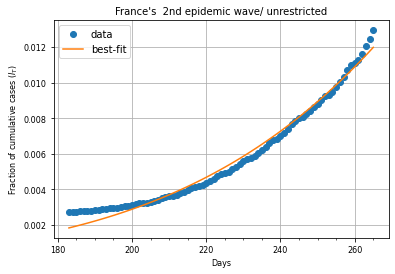

[[Model]]
    Model(fkin3)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 463
    # data points      = 83
    # variables        = 2
    chi-square         = 1.1309e-05
    reduced chi-square = 1.3962e-07
    Akaike info crit   = -1308.12664
    Bayesian info crit = -1303.28896
[[Variables]]
    b3: -5.08319364 +/- 0.08369288 (1.65%) (init = 0)
    c3:  1.7146e+14 +/- 7.8877e+13 (46.00%) (init = 3e+07)
[[Correlations]] (unreported correlations are < 0.100)
    C(b3, c3) = -1.000


In [53]:
a3, c3 =result3.best_values.values()
#,h
#str_h="{:.2f}".format(h)

fig,ax=plt.subplots()
result3.plot_fit(ax=ax)
ax.grid(True)
plt.xticks(size = 8)
plt.yticks(size = 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylabel("Fraction of cumulative cases ($I_T$)",fontsize=8)
ax.set_xlabel("Days",fontsize=8)
plt.title("France's  2nd epidemic wave/ unrestricted",fontsize=10)
#ax.set_title(country_name+ " h="+str_h)
#fig.savefig(country_name+".pdf")
plt.savefig(r'C:\Users\pol\Desktop\France_second_heard_period.eps', format='eps')
plt.show()
print(result3.fit_report())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


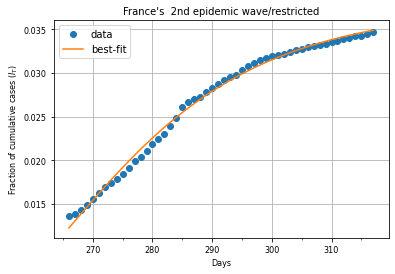

[[Model]]
    Model(fkin4)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 52
    # variables        = 3
    chi-square         = 1.2721e-05
    reduced chi-square = 2.5961e-07
    Akaike info crit   = -785.621994
    Bayesian info crit = -779.768263
[[Variables]]
    a4:  0.00311196 +/- 1.3484e-05 (0.43%) (init = 0.003157142)
    c4:  25.5019734 +/- 0.29981622 (1.18%) (init = 27.18)
    h4:  16.1055206 +/- 0.54203334 (3.37%) (init = 22.84)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, h4) =  0.982
    C(a4, c4) =  0.969
    C(c4, h4) =  0.932


In [54]:
a4, c4,h4 =result4.best_values.values()
#,h
#str_h="{:.2f}".format(h)

fig,ax=plt.subplots()
result4.plot_fit(ax=ax)
ax.grid(True)
plt.xticks(size = 8)
plt.yticks(size = 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylabel("Fraction of cumulative cases ($I_T$)",fontsize=8)
ax.set_xlabel("Days",fontsize=8)
plt.title("France's  2nd epidemic wave/restricted",fontsize=10)
#ax.set_title(country_name+ " h="+str_h)
#fig.savefig(country_name+".pdf")
plt.savefig(r'C:\Users\pol\Desktop\France_2ndfractal_period.eps', format='eps')
plt.show()
print(result4.fit_report())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


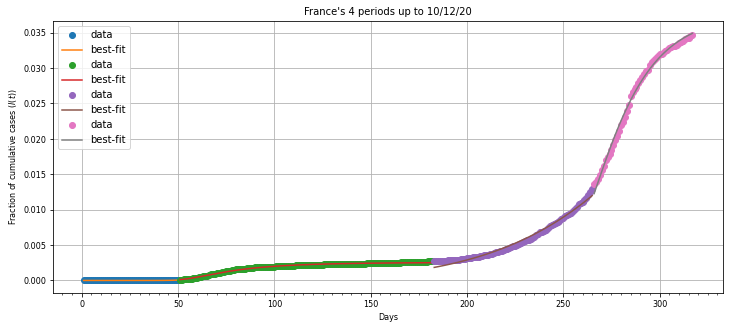

[[Model]]
    Model(fkin3)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 463
    # data points      = 83
    # variables        = 2
    chi-square         = 1.1309e-05
    reduced chi-square = 1.3962e-07
    Akaike info crit   = -1308.12664
    Bayesian info crit = -1303.28896
[[Variables]]
    b3: -5.08319364 +/- 0.08369288 (1.65%) (init = 0)
    c3:  1.7146e+14 +/- 7.8877e+13 (46.00%) (init = 3e+07)
[[Correlations]] (unreported correlations are < 0.100)
    C(b3, c3) = -1.000


In [55]:

#,h
#str_h="{:.2f}".format(h)

#fig,ax=plt.subplots()

#,h
#str_h="{:.2f}".format(h)


#ax.set_title(country_name+ " h="+str_h)
#fig.savefig(country_name+".pdf")
#plt.savefig(r'C:\Users\pol\Desktop\France_linear.eps', format='eps')
plt.show()


#ax.set_title(country_name+ " h="+str_h)
#fig.savefig(country_name+".pdf")
#plt.savefig(r'C:\Users\pol\Desktop\France_linear.eps', format='eps')



a1, c1 =result1.best_values.values()
a2,c2,h2 =result2.best_values.values()
a3, c3 =result3.best_values.values()
a4,c4,h4 =result4.best_values.values()
#,h
#str_h="{:.2f}".format(h)

fig,ax=plt.subplots(figsize=(12,5))
result1.plot_fit(ax=ax)
result2.plot_fit(ax=ax)
result3.plot_fit(ax=ax)
result4.plot_fit(ax=ax)
ax.grid(True)
plt.xticks(size = 8)
plt.yticks(size = 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylabel("Fraction of cumulative cases ($I(t)$)",fontsize=8)
ax.set_xlabel("Days",fontsize=8)
plt.title("France's 4 periods up to 10/12/20",fontsize=10)
#ax.set_title(country_name+ " h="+str_h)
#fig.savefig(country_name+".pdf")
plt.savefig(r'C:\Users\pol\Desktop\France_4periods_10_12_202.eps', format='eps')
plt.show()
print(result3.fit_report())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


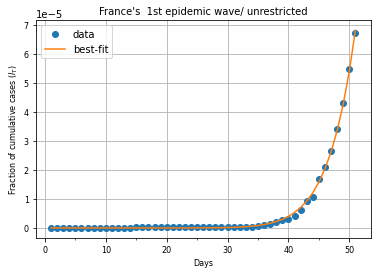

[[Model]]
    Model(fkin1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 740
    # data points      = 51
    # variables        = 2
    chi-square         = 8.6737e-12
    reduced chi-square = 1.7701e-13
    Akaike info crit   = -1495.53028
    Bayesian info crit = -1491.66663
[[Variables]]
    b1: -11.6946391 +/- 0.09377878 (0.80%) (init = 0)
    c1:  1.3682e+24 +/- 5.0038e+23 (36.57%) (init = 400000)
[[Correlations]] (unreported correlations are < 0.100)
    C(b1, c1) = -1.000


In [35]:
#first herd

a1, c1 =result1.best_values.values()

fig,ax=plt.subplots()
result1.plot_fit(ax=ax)
ax.grid(True)
plt.xticks(size = 8)
plt.yticks(size = 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylabel("Fraction of cumulative cases ($I_T$)",fontsize=8)
ax.set_xlabel("Days",fontsize=8)
plt.title("France's  1st epidemic wave/ unrestricted",fontsize=10)
#ax.set_title(country_name+ " h="+str_h)
#fig.savefig(country_name+".pdf")
plt.savefig(r'C:\Users\pol\Desktop\France_1stheard_period.eps', format='eps')
plt.show()
print(result1.fit_report())